# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports

#Data handling
import pandas as pd
from pathlib import Path

import numpy as np
from imblearn.over_sampling import SMOTE
import os


#TensorFlow and Keras for neural networks
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2


#Scikit-Learn for data preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame

csv_data = Path("./Resources/applicants_data.csv")

applicant_data_df = pd.read_csv(csv_data)

# Review the DataFrame
print(applicant_data_df.head())


        EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     

In [3]:
# Review the data types associated with the columns
print(applicant_data_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB
None


### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=["EIN", "NAME"])

# Review the DataFrame
print(applicant_data_df.head())


  APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1  


In [5]:
# Find out the number of unique values for each column
for column in applicant_data_df.select_dtypes(include=['object']).columns:
    print("\n",f"{column}: {applicant_data_df[column].nunique()} unique values.")



 APPLICATION_TYPE: 17 unique values.

 AFFILIATION: 6 unique values.

 CLASSIFICATION: 71 unique values.

 USE_CASE: 5 unique values.

 ORGANIZATION: 4 unique values.

 INCOME_AMT: 9 unique values.

 SPECIAL_CONSIDERATIONS: 2 unique values.


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [6]:
# Create a list of categorical variables 
categorical_variables = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE",
                         "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]
                         
# Display the categorical variables list
print(categorical_variables)


['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)


In [8]:
# Encode the categorcal variables using OneHotEncoder

##We are making a new dataframe with the column names of categorical variables from the applicant data DF.
##Then OneHotEncoder is doign a job blasting out the dataframe with the dummy variables

encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [9]:
# Create a DataFrame with the encoded variables
## Using int8 to save memory

encoded_df = pd.DataFrame(
    encoded_data,
    columns=enc.get_feature_names_out(categorical_variables)
).astype(np.int8)

# Review the DataFrame
print(encoded_df.head())

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  APPLICATION_TYPE_T13  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   APPLICATION_TYPE_T14  APPLICATION_TYPE_T15  APPLICATION_TYPE_T17  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T2  APPLICATION_TYPE_T25  \
0                     0                    0                     0   
1     

### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
## drop columns that are already contained in categorical_variables DataFrame

encoded_df = pd.concat(
    [
    applicant_data_df.drop(columns=categorical_variables),
    encoded_df
    ],
    axis=1
)

# Review the Dataframe
print(encoded_df.head())


   STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  \
0       1     5000              1                     1                     0   
1       1   108590              1                     0                     0   
2       1     5000              0                     0                     0   
3       1     6692              1                     0                     0   
4       1   142590              1                     0                     0   

   APPLICATION_TYPE_T13  APPLICATION_TYPE_T14  APPLICATION_TYPE_T15  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   APPLICATION_TYPE_T17  APPLICATION_TYPE_T19  ...  INCOME_AMT_1-9999  \
0            

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [11]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df["IS_SUCCESSFUL"]

# Display a sample of y
print(y.head())


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64


In [12]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns="IS_SUCCESSFUL")

# Review the features DataFrame
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 116 entries, STATUS to SPECIAL_CONSIDERATIONS_Y
dtypes: int64(2), int8(114)
memory usage: 4.3 MB
None


### Step 6: Split the features and target sets into training and testing datasets.


In [13]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [15]:
# Define the the number of inputs (features) to the model

## We just look at the 'X' matrix for this information

number_input_features = X.shape[1]

# Review the number of features
print(f"Number of input features: {number_input_features}")


Number of input features: 116


In [16]:
# Define the number of neurons in the output layer
## binary classification, so we want only a 1 or 0

number_output_neurons = 1

In [17]:
## Using 2/3 rule as suggestion for number of hidden neurons..
## Sandaya Krishnan, 'How do determine the number of layers and neurons in the hidden layer?', 09/09/2021
## Link <https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3>

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features * 2) // 3

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


77

In [18]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 * 2) // 3

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


51

In [19]:
# Create the Sequential model instance
nn = Sequential()


In [20]:
# Add the first hidden layer
nn.add(Dense(
    units=hidden_nodes_layer1,
    input_dim=number_input_features,
    activation="relu"
))


In [21]:
# Add the second hidden layer
nn.add(Dense(
    units=hidden_nodes_layer2,
    activation="relu"
))


In [22]:
# Add the output layer to the model specifying the number of output neurons and activation function
## we use the sigmoid function to squish everything to 0 or 1
nn.add(Dense(
    units=number_output_neurons,
    activation="sigmoid"
))


In [23]:
# Display the Sequential model summary
print(nn.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 77)                9009      
                                                                 
 dense_1 (Dense)             (None, 51)                3978      
                                                                 
 dense_2 (Dense)             (None, 1)                 52        
                                                                 
Total params: 13039 (50.93 KB)
Trainable params: 13039 (50.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [24]:
# Compile the Sequential model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [25]:
# Fit the model using 50 epochs and the training data
history_original = nn.fit(
    X_train_scaled,
    y_train,
    epochs=50
)

Epoch 1/50
804/804 [==============================] - 1s 466us/step - loss: 0.5762 - accuracy: 0.7207
Epoch 2/50
804/804 [==============================] - 0s 461us/step - loss: 0.5544 - accuracy: 0.7294
Epoch 3/50
804/804 [==============================] - 0s 470us/step - loss: 0.5508 - accuracy: 0.7311
Epoch 4/50
804/804 [==============================] - 0s 458us/step - loss: 0.5474 - accuracy: 0.7338
Epoch 5/50
804/804 [==============================] - 0s 464us/step - loss: 0.5469 - accuracy: 0.7334
Epoch 6/50
804/804 [==============================] - 0s 457us/step - loss: 0.5453 - accuracy: 0.7333
Epoch 7/50
804/804 [==============================] - 0s 454us/step - loss: 0.5445 - accuracy: 0.7342
Epoch 8/50
804/804 [==============================] - 0s 456us/step - loss: 0.5430 - accuracy: 0.7350
Epoch 9/50
804/804 [==============================] - 0s 456us/step - loss: 0.5427 - accuracy: 0.7365
Epoch 10/50
804/804 [==============================] - 0s 464us/step - loss: 0.541

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [26]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Save the model loss and accuracy values as variables
loss_original_model = model_loss
accuracy_original_model = model_accuracy

# Display the model loss and accuracy results
print(f"Loss: {loss_original_model}, Accuracy: {accuracy_original_model}")


268/268 - 0s - loss: 0.5545 - accuracy: 0.7272 - 116ms/epoch - 435us/step
Loss: 0.5544714331626892, Accuracy: 0.7272303104400635


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [27]:
# Set the model's file path

model_locale_path = "Model_Locale"
os.makedirs(model_locale_path, exist_ok=True)
file_path = os.path.join(model_locale_path, "AlphabetSoup.h5")

# Export your model to a HDF5 file
nn.save(file_path)


/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [28]:
## Drop "CLASSIFICATION" and "APPLICATION_TYPE" from the already transformed applicant_data_df DataFrame
## Keep 2 hidden layers
## Stick to the 2/3 rule of thumnb
## Keep 50 epochs

applicant_data_df = applicant_data_df.drop(columns=["CLASSIFICATION"])


In [29]:
# Find out the number of unique values for each column
for column in applicant_data_df.select_dtypes(include=['object']).columns:
    print("\n",f"{column}: {applicant_data_df[column].nunique()} unique values.")


 APPLICATION_TYPE: 17 unique values.

 AFFILIATION: 6 unique values.

 USE_CASE: 5 unique values.

 ORGANIZATION: 4 unique values.

 INCOME_AMT: 9 unique values.

 SPECIAL_CONSIDERATIONS: 2 unique values.


In [30]:
# Create a list of categorical variables 
categorical_variables_alt1 = ["APPLICATION_TYPE", "AFFILIATION", "USE_CASE",
                         "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]
                         
# Create a OneHotEncoder instance
enc_alt1 = OneHotEncoder(sparse_output=False)

encoded_data_alt1 = enc_alt1.fit_transform(applicant_data_df[categorical_variables_alt1])

encoded_df_alt1 = pd.DataFrame(
    encoded_data_alt1,
    columns=enc_alt1.get_feature_names_out(categorical_variables_alt1)).astype(np.int8)




In [31]:
encoded_df_alt1 = pd.concat(
    [
    applicant_data_df.drop(columns=categorical_variables_alt1),
    encoded_df_alt1
    ],
    axis=1
)

In [32]:
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [33]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df_alt1.drop(columns="IS_SUCCESSFUL")

# Review the features DataFrame
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   APPLICATION_TYPE_T10          34299 non-null  int8 
 3   APPLICATION_TYPE_T12          34299 non-null  int8 
 4   APPLICATION_TYPE_T13          34299 non-null  int8 
 5   APPLICATION_TYPE_T14          34299 non-null  int8 
 6   APPLICATION_TYPE_T15          34299 non-null  int8 
 7   APPLICATION_TYPE_T17          34299 non-null  int8 
 8   APPLICATION_TYPE_T19          34299 non-null  int8 
 9   APPLICATION_TYPE_T2           34299 non-null  int8 
 10  APPLICATION_TYPE_T25          34299 non-null  int8 
 11  APPLICATION_TYPE_T29          34299 non-null  int8 
 12  APPLICATION_TYPE_T3           34299 non-null  int8 
 13  APPLICATION_TYPE_T4           3

In [34]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Define the the number of inputs (features) to the model
number_input_features_A1 = len(X_train.iloc[0])

# Review the number of features
number_input_features_A1

45

In [37]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [38]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features * 2) //3

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

77

In [39]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = (hidden_nodes_layer1_A1 * 2) //3

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A1

51

In [40]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [41]:
# First hidden layer
nn_A1.add(Dense(
    units=hidden_nodes_layer1_A1,
    input_dim=number_input_features_A1,
    activation="relu"
))

# Second hidden layer
nn_A1.add(Dense(
    units=hidden_nodes_layer2_A1,
    activation="relu"
))

# Output layer
nn_A1.add(Dense(
    units=number_output_neurons,
    activation="sigmoid"
))

# Check the structure of the model
print(nn_A1.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 77)                3542      
                                                                 
 dense_4 (Dense)             (None, 51)                3978      
                                                                 
 dense_5 (Dense)             (None, 1)                 52        
                                                                 
Total params: 7572 (29.58 KB)
Trainable params: 7572 (29.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [42]:
# Compile the Sequential model
nn_A1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [43]:
# Fit the model using 50 epochs and the training data
history_A1 = nn_A1.fit(
    X_train_scaled,
    y_train,
    epochs=50
)


Epoch 1/50
804/804 [==============================] - 0s 455us/step - loss: 0.5829 - accuracy: 0.7200
Epoch 2/50
804/804 [==============================] - 0s 457us/step - loss: 0.5726 - accuracy: 0.7242
Epoch 3/50
804/804 [==============================] - 0s 445us/step - loss: 0.5703 - accuracy: 0.7256
Epoch 4/50
804/804 [==============================] - 0s 447us/step - loss: 0.5683 - accuracy: 0.7261
Epoch 5/50
804/804 [==============================] - 0s 444us/step - loss: 0.5671 - accuracy: 0.7271
Epoch 6/50
804/804 [==============================] - 0s 449us/step - loss: 0.5673 - accuracy: 0.7278
Epoch 7/50
804/804 [==============================] - 0s 443us/step - loss: 0.5663 - accuracy: 0.7275
Epoch 8/50
804/804 [==============================] - 0s 459us/step - loss: 0.5661 - accuracy: 0.7282
Epoch 9/50
804/804 [==============================] - 0s 448us/step - loss: 0.5654 - accuracy: 0.7282
Epoch 10/50
804/804 [==============================] - 0s 441us/step - loss: 0.565

In [44]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A1, model_accuracy_A1 = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Save the model loss and accuracy values as variables for Alternative Model 1
loss_alternative_model_1 = model_loss_A1
accuracy_alternative_model_1 = model_accuracy_A1

# Display the model loss and accuracy results for Alternative Model 1
print("Alternative Model 1 Results")
print(f"Loss: {loss_alternative_model_1}, Accuracy: {accuracy_alternative_model_1}")


268/268 - 0s - loss: 0.5714 - accuracy: 0.7226 - 108ms/epoch - 403us/step
Alternative Model 1 Results
Loss: 0.5713709592819214, Accuracy: 0.7225655913352966


#### Alternative Model 2

In [45]:
## Add dropout layers and regularization to our model
## Reduce the number of hidden neurons per layer


In [46]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features * 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

58

In [47]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = (hidden_nodes_layer1_A1 * 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A2

38

In [48]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [49]:
# First hidden layer with dropout and L2 regularization
nn_A2.add(Dense(
    units=hidden_nodes_layer1_A2,
    input_dim=number_input_features_A1,
    activation="relu",
    kernel_regularizer=l2(0.01)
))
nn_A2.add(Dropout(0.5)) 

# Second hidden layer with dropout and L2 regularization
nn_A2.add(Dense(
    units=hidden_nodes_layer2_A2,
    activation="relu",
    kernel_regularizer=l2(0.01)
))
nn_A2.add(Dropout(0.5))

# Output layer
nn_A2.add(Dense(
    units=number_output_neurons,
    activation="sigmoid"
))

# Check the structure of the model
print(nn_A2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 58)                2668      
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense_7 (Dense)             (None, 38)                2242      
                                                                 
 dropout_1 (Dropout)         (None, 38)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 39        
                                                                 
Total params: 4949 (19.33 KB)
Trainable params: 4949 (19.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
# Compile the Sequential model
nn_A2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [51]:
# Fit the model using 50 epochs and the training data
history_A2 = nn_A2.fit(
    X_train_scaled,
    y_train,
    epochs=50
)

Epoch 1/50
804/804 [==============================] - 1s 463us/step - loss: 0.9642 - accuracy: 0.6801
Epoch 2/50
804/804 [==============================] - 0s 444us/step - loss: 0.6440 - accuracy: 0.7203
Epoch 3/50
804/804 [==============================] - 0s 446us/step - loss: 0.6109 - accuracy: 0.7210
Epoch 4/50
804/804 [==============================] - 0s 437us/step - loss: 0.6070 - accuracy: 0.7226
Epoch 5/50
804/804 [==============================] - 0s 438us/step - loss: 0.6047 - accuracy: 0.7222
Epoch 6/50
804/804 [==============================] - 0s 440us/step - loss: 0.6039 - accuracy: 0.7207
Epoch 7/50
804/804 [==============================] - 0s 446us/step - loss: 0.6031 - accuracy: 0.7216
Epoch 8/50
804/804 [==============================] - 0s 444us/step - loss: 0.6012 - accuracy: 0.7207
Epoch 9/50
804/804 [==============================] - 0s 440us/step - loss: 0.6009 - accuracy: 0.7206
Epoch 10/50
804/804 [==============================] - 0s 436us/step - loss: 0.602

In [52]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A2, model_accuracy_A2 = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Save the model loss and accuracy values as variables for Alternative Model 2
loss_alternative_model_2 = model_loss_A2
accuracy_alternative_model_2 = model_accuracy_A2

# Display the model loss and accuracy results for Alternative Model 2
print("Alternative Model 2 Results")
print(f"Loss: {loss_alternative_model_2}, Accuracy: {accuracy_alternative_model_2}")


268/268 - 0s - loss: 0.5886 - accuracy: 0.7227 - 105ms/epoch - 391us/step
Alternative Model 2 Results
Loss: 0.5886034369468689, Accuracy: 0.7226822376251221


### Model 3 ###

In [53]:
## We're going to look at whether we have a balanced dataset, and then undersample the majority 
## No regularization or dropout

In [54]:
target_counts = y.value_counts()
print(target_counts)

# Calculate the class ratios (optional)
class_ratios = target_counts / len(y)
print(class_ratios)

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64
IS_SUCCESSFUL
1    0.532406
0    0.467594
Name: count, dtype: float64


In [55]:
## Use SMOTE to generate synthetic samples for the minority class

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)



In [56]:
## Check the shape of X_resampled

number_of_input_features_A3 = X_resampled.shape[1]
print(number_of_input_features_A3)

45


In [57]:
# Create the Sequential model instance
nn_A3 = Sequential()

# First hidden layer with dropout and L2 regularization
nn_A3.add(Dense(
    units=hidden_nodes_layer1_A2,
    input_dim=number_of_input_features_A3,
    activation="relu",
    kernel_regularizer=l2(0.01)
))
nn_A3.add(Dropout(0.5))

# Second hidden layer with dropout and L2 regularization
nn_A3.add(Dense(
    units=hidden_nodes_layer2_A2,
    activation="relu"
))
nn_A3.add(Dropout(0.5))


# Output layer
nn_A3.add(Dense(
    units=number_output_neurons,
    activation="sigmoid"
))

# Check the structure of the model
print(nn_A3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 58)                2668      
                                                                 
 dropout_2 (Dropout)         (None, 58)                0         
                                                                 
 dense_10 (Dense)            (None, 38)                2242      
                                                                 
 dropout_3 (Dropout)         (None, 38)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 39        
                                                                 
Total params: 4949 (19.33 KB)
Trainable params: 4949 (19.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [58]:
# Compile the model
nn_A3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [59]:
# Train the model using the resampled data.
history_A3 = nn_A3.fit(X_resampled, y_resampled, epochs=50)


Epoch 1/50
858/858 [==============================] - 1s 444us/step - loss: 0.7539 - accuracy: 0.6831
Epoch 2/50
858/858 [==============================] - 0s 445us/step - loss: 0.6149 - accuracy: 0.7158
Epoch 3/50
858/858 [==============================] - 0s 434us/step - loss: 0.6015 - accuracy: 0.7186
Epoch 4/50
858/858 [==============================] - 0s 436us/step - loss: 0.5980 - accuracy: 0.7190
Epoch 5/50
858/858 [==============================] - 0s 445us/step - loss: 0.5946 - accuracy: 0.7194
Epoch 6/50
858/858 [==============================] - 0s 452us/step - loss: 0.5956 - accuracy: 0.7184
Epoch 7/50
858/858 [==============================] - 0s 435us/step - loss: 0.5940 - accuracy: 0.7195
Epoch 8/50
858/858 [==============================] - 0s 435us/step - loss: 0.5936 - accuracy: 0.7180
Epoch 9/50
858/858 [==============================] - 0s 434us/step - loss: 0.5937 - accuracy: 0.7160
Epoch 10/50
858/858 [==============================] - 0s 437us/step - loss: 0.592

In [60]:
# Evaluate the model on the test data.
y_pred = nn_A3.predict(X_test_scaled)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy}")


268/268 [==============================] - 0s 269us/step
Test Accuracy: 0.7252478134110787


In [61]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A3, model_accuracy_A3 = nn_A3.evaluate(X_test_scaled, y_test, verbose=2)

# Save the model loss and accuracy values as variables for Alternative Model 3
loss_alternative_model_3 = model_loss_A3
accuracy_alternative_model_3 = model_accuracy_A3

# Display the model loss and accuracy results for Alternative Model 3
print("Alternative Model 3 Results")
print(f"Loss: {loss_alternative_model_3}, Accuracy: {accuracy_alternative_model_3}")


268/268 - 0s - loss: 0.5822 - accuracy: 0.7252 - 104ms/epoch - 390us/step
Alternative Model 3 Results
Loss: 0.5822108387947083, Accuracy: 0.7252478003501892


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [62]:
# Original Model Results
print("Original Model Results")
print(f"Loss: {loss_original_model}, Accuracy: {accuracy_original_model}")


Original Model Results
Loss: 0.5544714331626892, Accuracy: 0.7272303104400635


In [63]:
# Results for Alternative Model 1
print("Alternative Model 1 Results")
print(f"Loss: {loss_alternative_model_1}, Accuracy: {accuracy_alternative_model_1}")


Alternative Model 1 Results
Loss: 0.5713709592819214, Accuracy: 0.7225655913352966


In [64]:
# Results for Alternative Model 2
print("Alternative Model 2 Results")
print(f"Loss: {loss_alternative_model_2}, Accuracy: {accuracy_alternative_model_2}")


Alternative Model 2 Results
Loss: 0.5886034369468689, Accuracy: 0.7226822376251221


In [65]:
# Results for Alternative Model 3
print("Alternative Model 3 Results")
print(f"Loss: {loss_alternative_model_3}, Accuracy: {accuracy_alternative_model_3}")

Alternative Model 3 Results
Loss: 0.5822108387947083, Accuracy: 0.7252478003501892


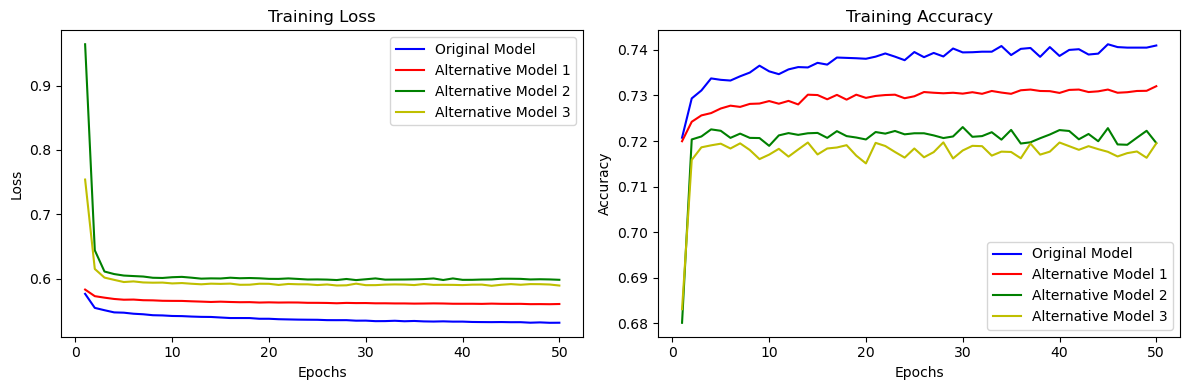

In [66]:
import matplotlib.pyplot as plt

# Data for original model
epochs_original = range(1, len(history_original.history['loss']) + 1)
loss_original = history_original.history['loss']
accuracy_original = history_original.history['accuracy']

# Data for alternative model 1
epochs_A1 = range(1, len(history_A1.history['loss']) + 1)
loss_A1 = history_A1.history['loss']
accuracy_A1 = history_A1.history['accuracy']

# Data for alternative model 2
epochs_A2 = range(1, len(history_A2.history['loss']) + 1)
loss_A2 = history_A2.history['loss']
accuracy_A2 = history_A2.history['accuracy']

# Data for alternative model 3
epochs_A3 = range(1, len(history_A3.history['loss']) + 1)
loss_A3 = history_A3.history['loss']
accuracy_A3 = history_A3.history['accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(epochs_original, loss_original, 'b', label='Original Model')
ax1.plot(epochs_A1, loss_A1, 'r', label='Alternative Model 1')
ax1.plot(epochs_A2, loss_A2, 'g', label='Alternative Model 2')
ax1.plot(epochs_A3, loss_A3, 'y', label='Alternative Model 3')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(epochs_original, accuracy_original, 'b', label='Original Model')
ax2.plot(epochs_A1, accuracy_A1, 'r', label='Alternative Model 1')
ax2.plot(epochs_A2, accuracy_A2, 'g', label='Alternative Model 2')
ax2.plot(epochs_A3, accuracy_A3, 'y', label='Alternative Model 3')
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


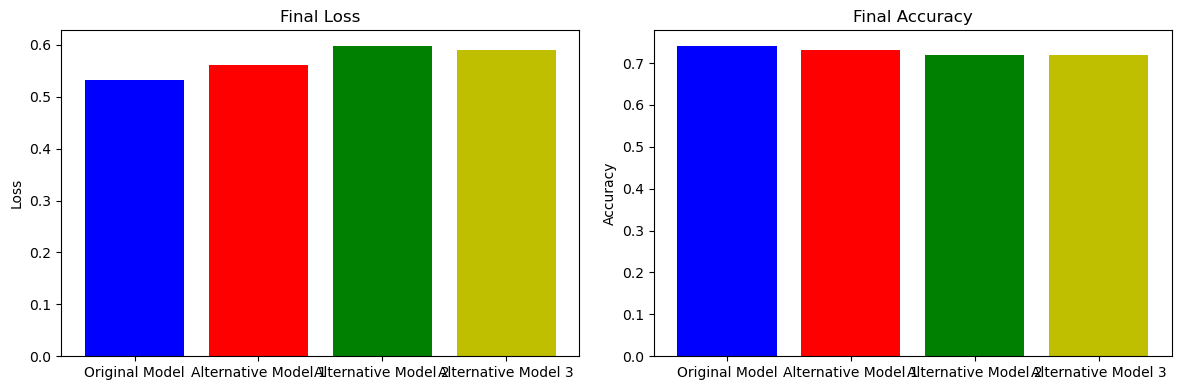

In [69]:
import matplotlib.pyplot as plt

# Loss and accuracy values for all models
loss_values = [loss_original[-1], loss_A1[-1], loss_A2[-1], loss_A3[-1]]
accuracy_values = [accuracy_original[-1], accuracy_A1[-1], accuracy_A2[-1], accuracy_A3[-1]]

# Model labels
models = ['Original Model', 'Alternative Model 1', 'Alternative Model 2', 'Alternative Model 3']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot for loss
ax1.bar(models, loss_values, color=['b', 'r', 'g', 'y'])
ax1.set_title('Final Loss')
ax1.set_ylabel('Loss')

# Bar plot for accuracy
ax2.bar(models, accuracy_values, color=['b', 'r', 'g', 'y'])
ax2.set_title('Final Accuracy')
ax2.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


### Step 3: Save each of your alternative models as an HDF5 file.


In [67]:
# Specify the directory path where the models will be saved
model_folder = "Model_Locale"

# Set the file path for the first alternative model
file_path_A1 = os.path.join(model_folder, "model_alternative_1.h5")

# Export your first alternative model to an HDF5 file
nn_A1.save(file_path_A1)

# Set the file path for the second alternative model
file_path_A2 = os.path.join(model_folder, "model_alternative_2.h5")

# Export your second alternative model to an HDF5 file
nn_A2.save(file_path_A2)

# Set the file path for the third alternative model
file_path_A3 = os.path.join(model_folder, "model_alternative_3.h5")

# Export your third alternative model to an HDF5 file
nn_A3.save(file_path_A3)

/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
## Checking that the models were exported

# Define the folder where the model files are expected to be
model_folder = "Model_Locale"

# List of model filenames
model_filenames = [
    "AlphabetSoup.h5",  # Original model
    "model_alternative_1.h5",
    "model_alternative_2.h5",
    "model_alternative_3.h5",
]

# Check if the folder exists
if os.path.exists(model_folder):
    print(f"Model folder '{model_folder}' exists.")
    
    # List files in the folder
    files_in_folder = os.listdir(model_folder)
    
    # Check if each model file exists in the folder
    for model_filename in model_filenames:
        if model_filename in files_in_folder:
            print(f"'{model_filename}' is present in the folder.")
        else:
            print(f"'{model_filename}' is NOT present in the folder.")
else:
    print(f"Model folder '{model_folder}' does NOT exist.")


Model folder 'Model_Locale' exists.
'AlphabetSoup.h5' is present in the folder.
'model_alternative_1.h5' is present in the folder.
'model_alternative_2.h5' is present in the folder.
'model_alternative_3.h5' is present in the folder.
